### Step 1: Importing the Relevant Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [3]:
df= pd.read_csv("bigmart_train.csv")


In [4]:
df.shape

(8523, 12)

In [5]:
#ratio of null values
(df.isnull().sum()/df.shape[0] *100).round()

Item_Identifier               0.0
Item_Weight                  17.0
Item_Fat_Content              0.0
Item_Visibility               0.0
Item_Type                     0.0
Item_MRP                      0.0
Outlet_Identifier             0.0
Outlet_Establishment_Year     0.0
Outlet_Size                  28.0
Outlet_Location_Type          0.0
Outlet_Type                   0.0
Item_Outlet_Sales             0.0
dtype: float64

In [6]:
#categorical features
categorical = df.select_dtypes(include ='O')
print("Categorical Features in Train Set:",categorical.shape[1])

Categorical Features in Train Set: 7


In [7]:
#numerical features
numerical= df.select_dtypes(include =['float64','int64'])
print("Numerical Features in Train Set:",numerical.shape[1])

Numerical Features in Train Set: 5


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

__3.1 Item Weight__

<AxesSubplot:xlabel='Item_Weight'>

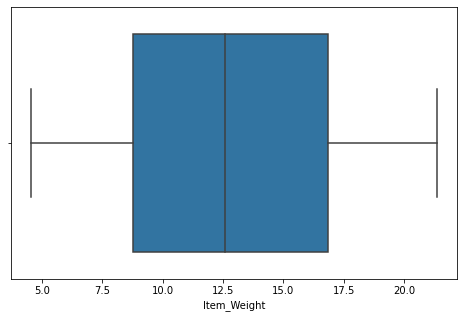

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df)

<AxesSubplot:ylabel='Frequency'>

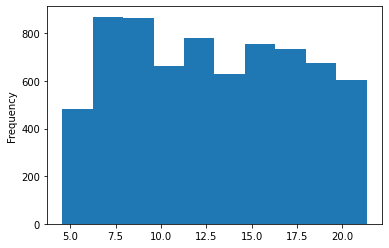

In [10]:
df['Item_Weight'].plot(kind='hist',bins=10)
#or# df.hist('Item_Weight',bins=10)
#or# df['Item_Weight'].hist(bins=10)


__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

In [11]:
# Imputing with Mean
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [12]:
df['Item_Weight'].isnull().sum()

0

We have succesfully imputed the missing values from the column Item_Weight

__3.2 : Outlet Size__

In [13]:
df['Outlet_Size'].isnull().sum()

2410

In [14]:
print(df['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


__Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [15]:
#Imputing with Mode
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [16]:
df['Outlet_Size'].isnull().sum()

0

__We have succesfully imputed the missing values from the column Outlet_Size.__

#### Outliers:

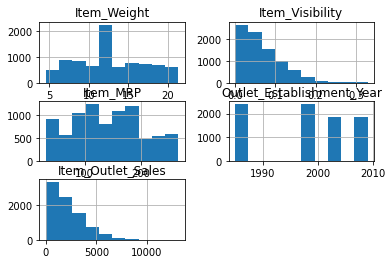

In [17]:
df.hist()
plt.show()

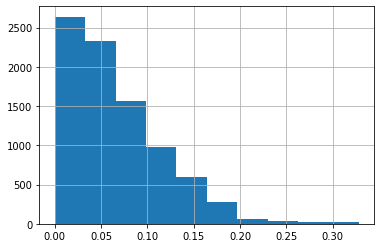

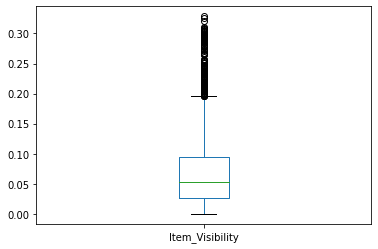

In [18]:
df['Item_Visibility'].hist()
plt.show()

df['Item_Visibility'].plot(kind='box')
plt.show()

In [19]:
Q1=df['Item_Visibility'].quantile(.25)

Q3=df['Item_Visibility'].quantile(.75)

IQR=Q3-Q1

In [25]:
df=df.query('(@Q1-1.5*@IQR)  <= Item_Visibility <= (@Q3+1.5*@IQR)')  #Droping Outliers

In [26]:
df.shape

(8379, 12)

### Step 4: Exploratory Data Analysis

In [21]:
#converting it to categorical variable

df['Item_Visibility_bins']=pd.cut(df['Item_Visibility'],[-0.01,0.065,0.13,0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [22]:
df['Item_Visibility_bins'].unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [23]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Visibility_bins'],
      dtype='object')

In [24]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Viz


In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [26]:
# df['Item_Fat_Content'].replace(['low fat','LF'],  'Low Fat'  ,inplace = True)
# df['Item_Fat_Content'].replace('reg'           ,  'Regular'  ,inplace = True)
# #Or
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [27]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8379, dtype: object

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

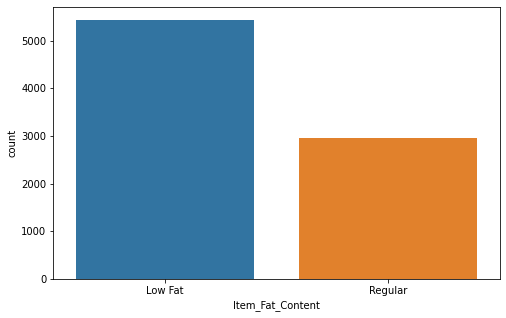

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df)

__The Items bought are more of Low Fat.__

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

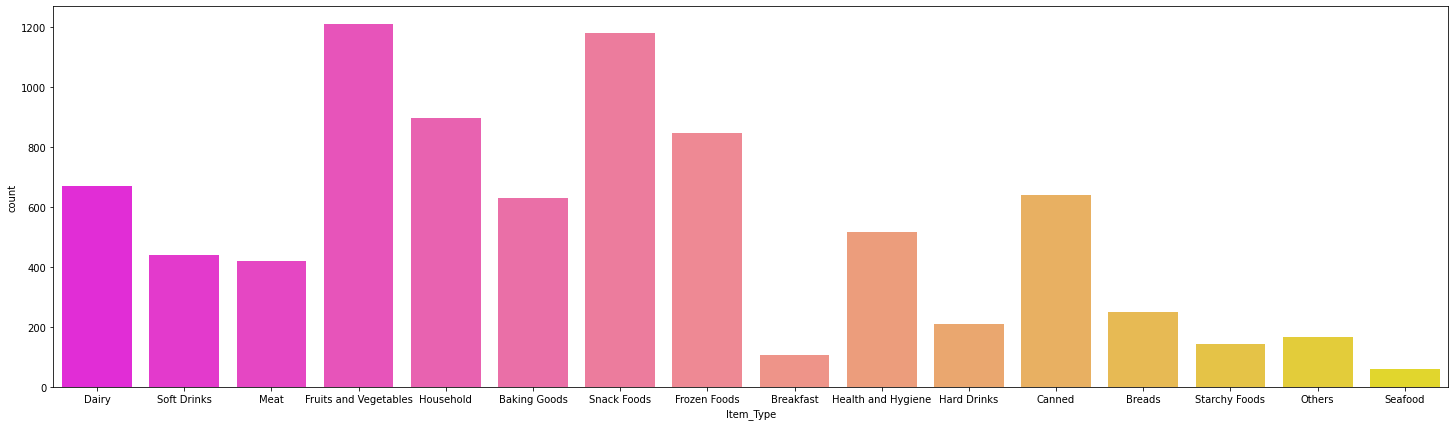

In [29]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df,palette='spring')

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

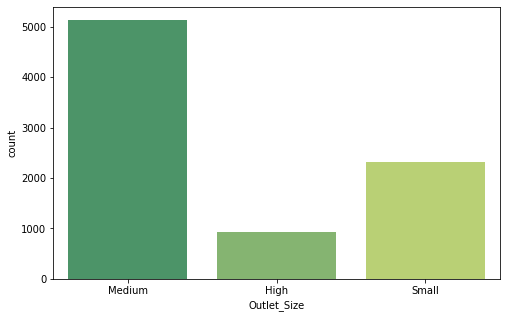

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df,palette='summer')

* __The Outlets are more of Medium Size__

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

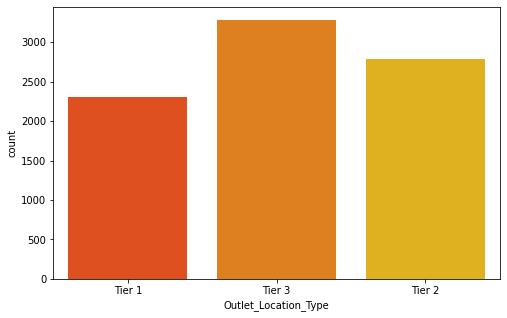

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df,palette='autumn')

* __The Outlets are maximum in number in Tier 3 Cities__

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

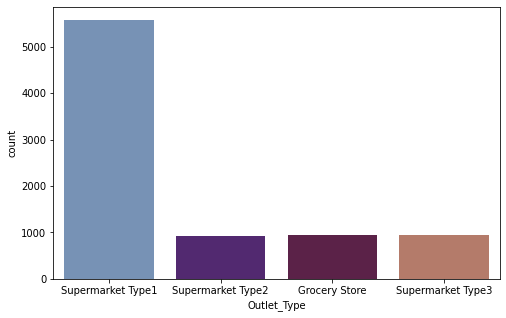

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df,palette='twilight')

* __The Outlets are more of Supermarket Type1__

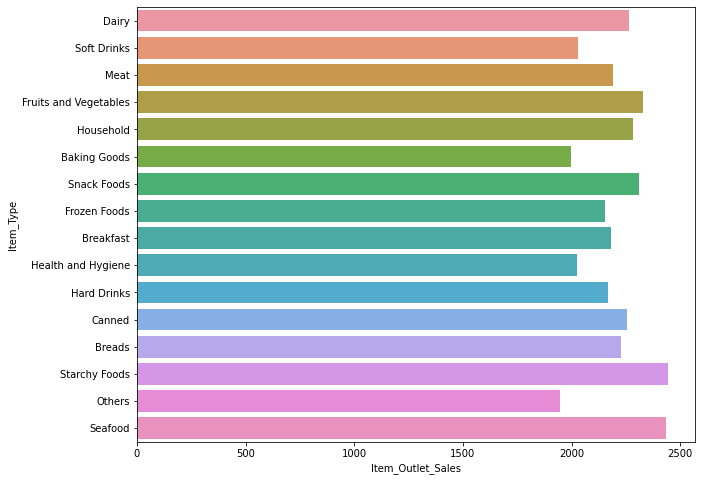

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,ci=0)
plt.show()

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Item_Visibility_bins       8379 non-null   category
dtypes: category(1), float64(4), int64

In [35]:
#cat_cols = df.select_dtypes(include='O').columns
#or
cat_cols = df.describe(include=['object','category']).columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Visibility_bins'],
      dtype='object')

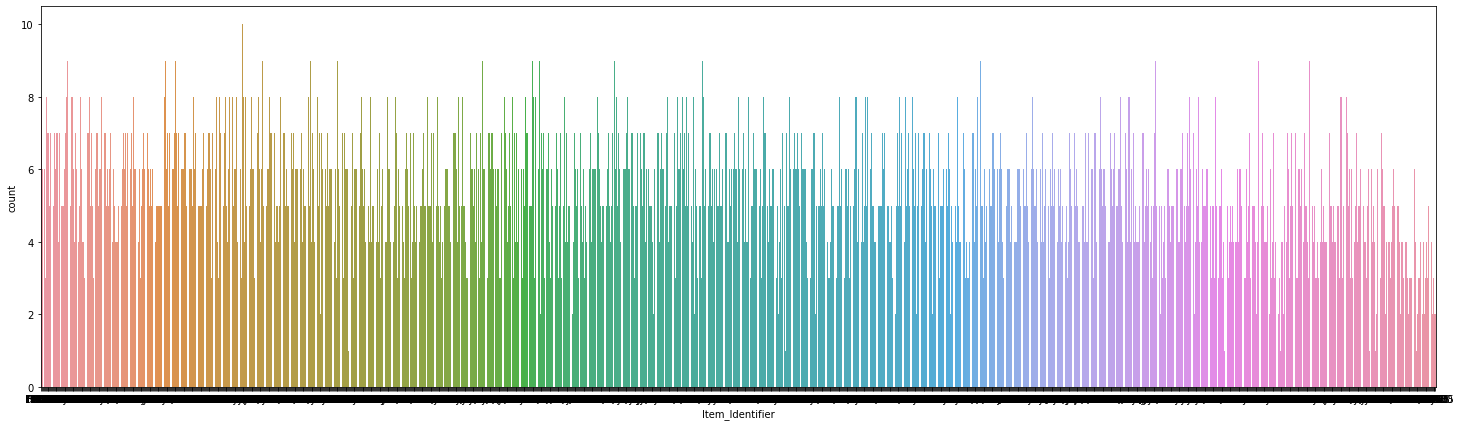

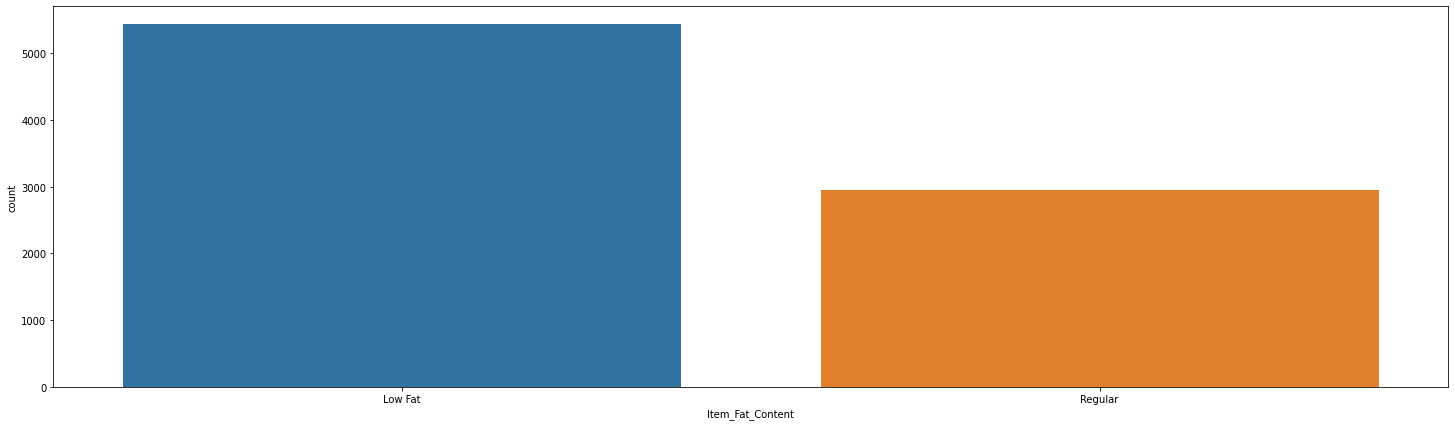

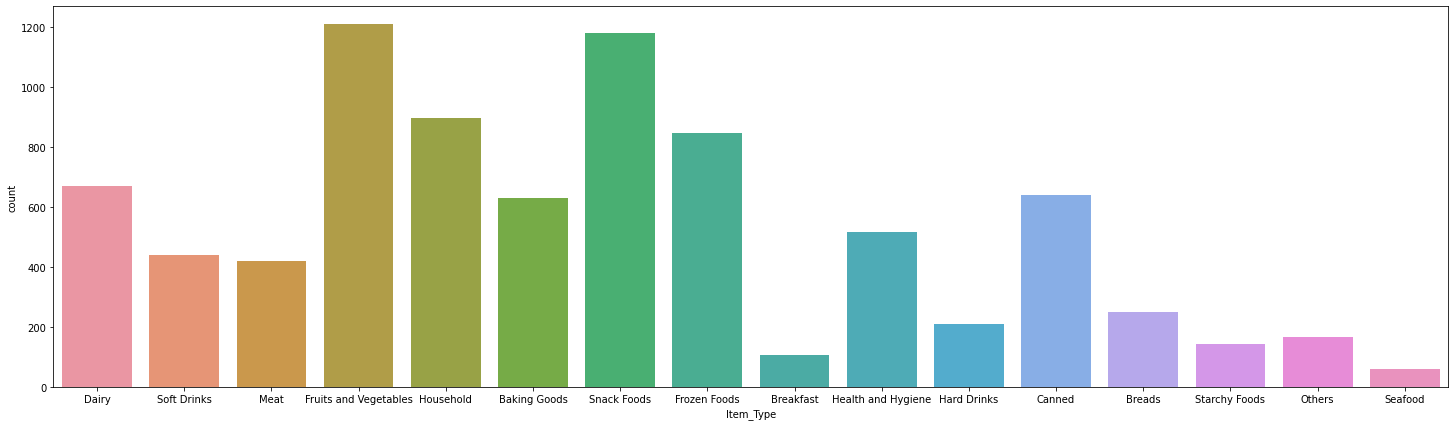

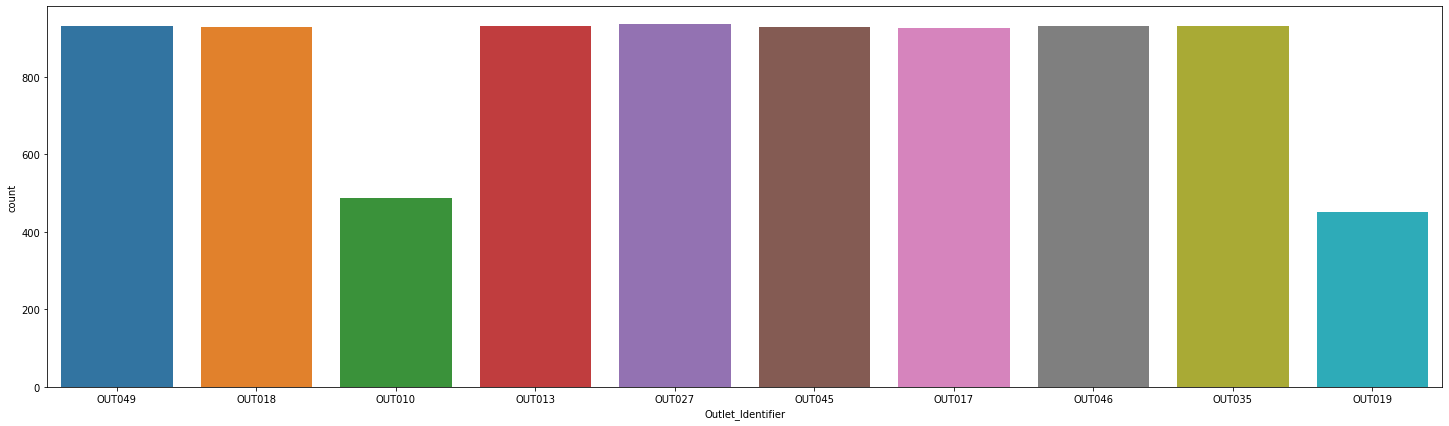

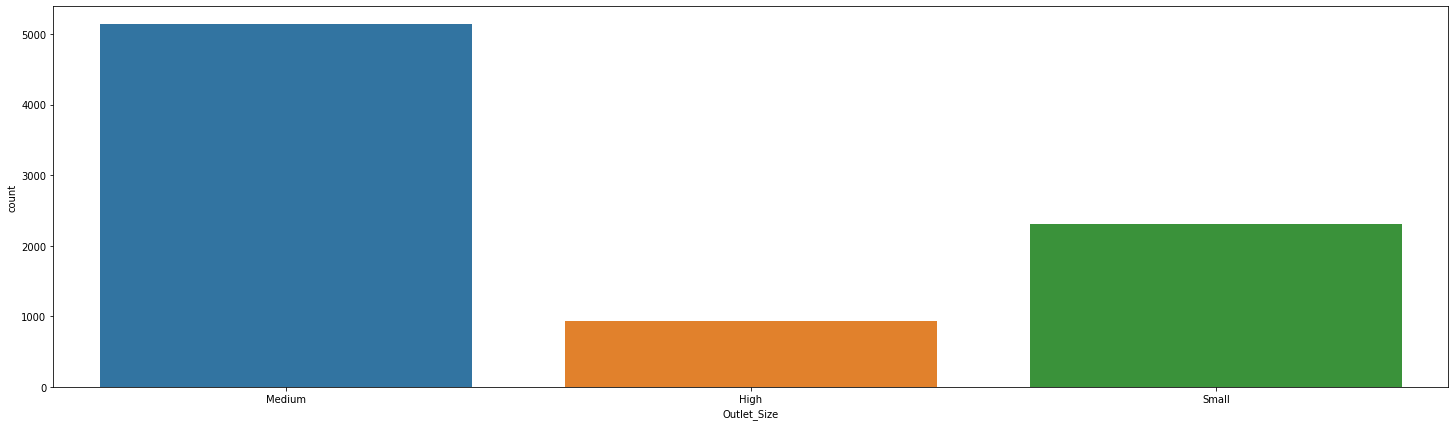

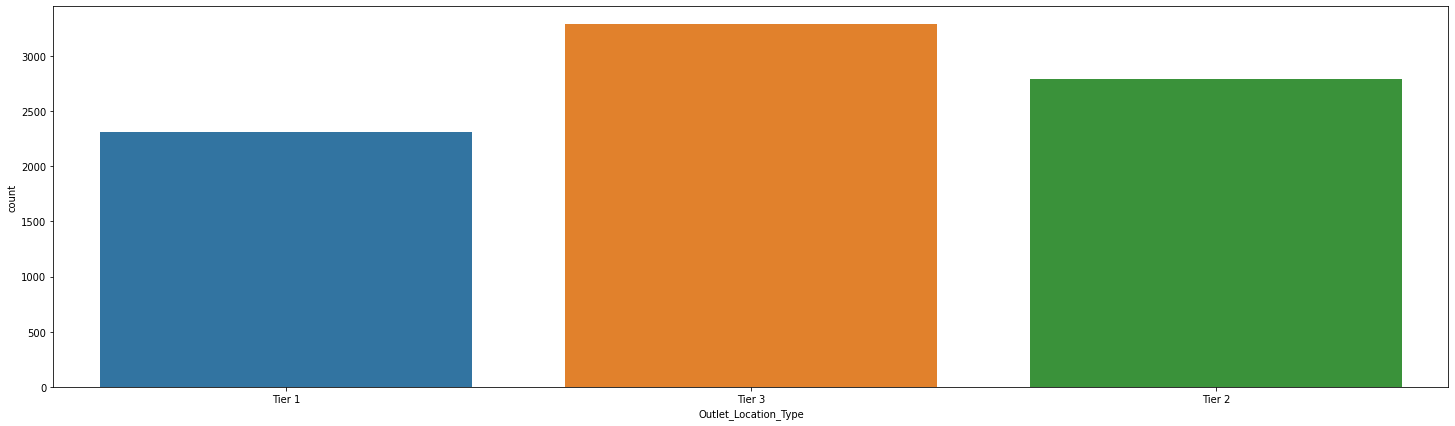

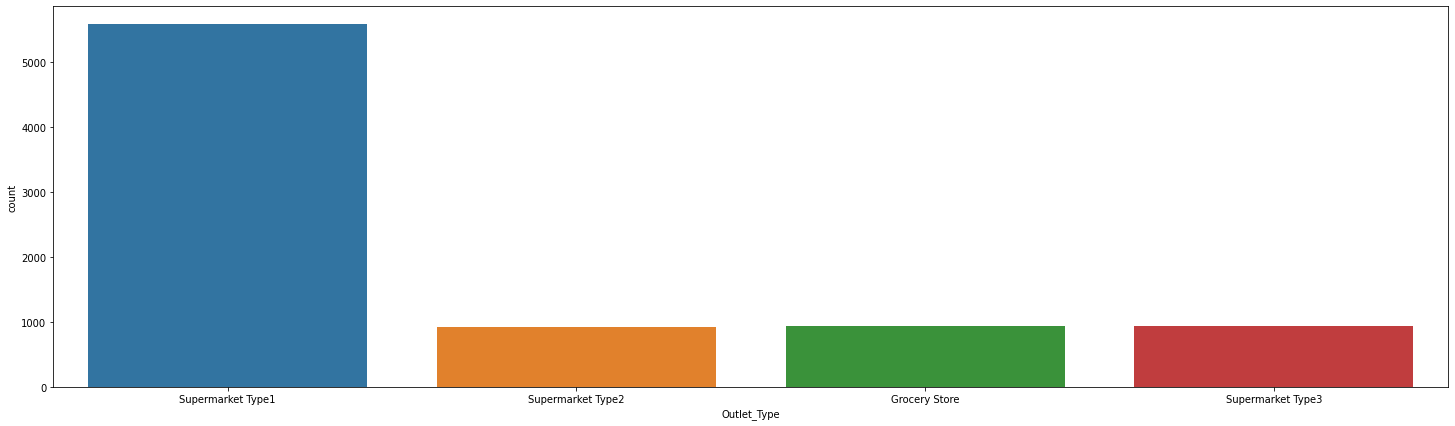

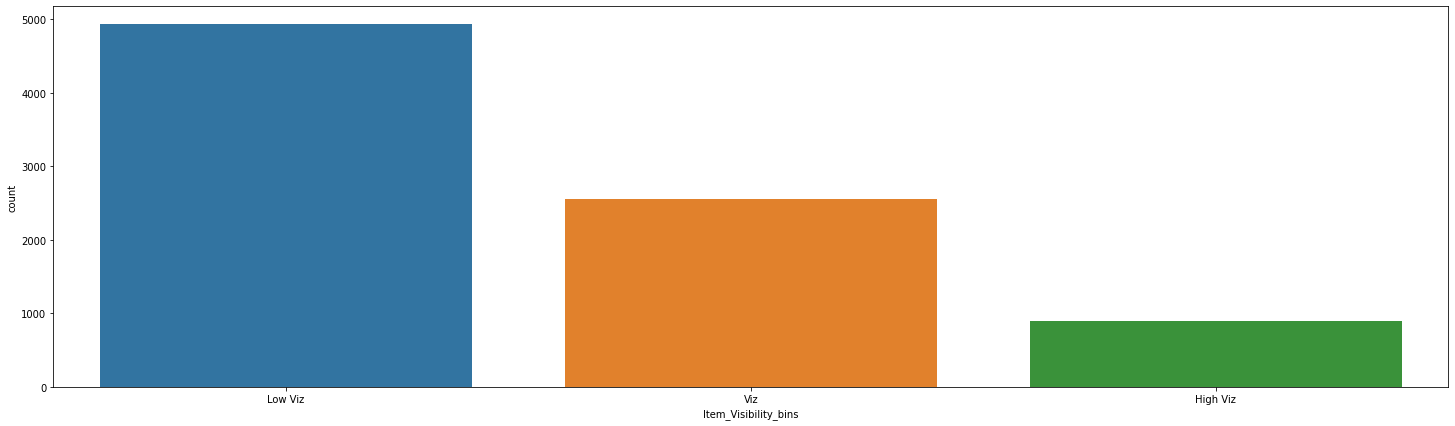

In [36]:
for i in cat_cols:
    plt.figure(figsize=(25,7))
    sns.countplot(df[i])
    plt.show()

### Step 5 : Feature Engineering

__Determine the years of operation of a store__

In [37]:
#Years:
df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']

__Create a broad category of Type of Item__

In [38]:
s='aditya'
s[:2]

'ad'

In [39]:
myfun=  lambda x: x[:2]

In [40]:
myfun(s)

'ad'

In [41]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(myfun)

In [42]:
# df.Item_Type_Combined.replace(['FD','DR','NC'],['Food','Non-Consumable','Drinks'],inplace=True)
#or
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})

In [43]:
df.Item_Type_Combined.unique()

array(['Food', 'Drinks', 'Non-Consumable'], dtype=object)

__Modify categories of Item_Fat_Content__

In [44]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [45]:
df['Item_Fat_Content'].value_counts()

Low Fat       3852
Regular       2947
Non-Edible    1580
Name: Item_Fat_Content, dtype: int64

__Numerical and One-Hot Coding of Categorical variables__

In [46]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Viz,22,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Viz,12,Drinks


In [47]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Visibility_bins'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Visibility_bins'] = le.fit_transform(df['Item_Visibility_bins'])

In [49]:
#One Hot Coding:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [50]:
pd.set_option('display.max_columns',50)

In [51]:
df.shape

(8379, 35)

### Step 6: Building Model

In [52]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Visibility_bins', 'Outlet_Years', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consumable',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Ide

In [53]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_bins,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,1,22,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,1,12,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,1,22,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,1998,732.3800,1,23,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,1987,994.7052,1,34,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [55]:
df.shape

(8379, 35)

In [56]:
df = df.select_dtypes(exclude='object')
df.drop(columns=['Item_Visibility' ,'Outlet_Establishment_Year' ],axis=1,inplace=True)

In [57]:
df.shape

(8379, 31)

In [58]:
# Seperate Features and Target
X= df.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= df['Item_Outlet_Sales']

In [59]:
X

,Item_Weight,Item_MRP,Item_Visibility_bins,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,249.8092,1,22,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,5.920,48.2692,1,12,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.500,141.6180,1,22,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,19.200,182.0950,1,23,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,8.930,53.8614,1,34,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,1,34,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8519,8.380,108.1570,1,19,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8520,10.600,85.1224,1,17,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8521,7.210,103.1332,0,12,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [60]:
X.isna().sum()

Item_Weight                          0
Item_MRP                             0
Item_Visibility_bins                 0
Outlet_Years                         0
Item_Fat_Content_Low Fat             0
Item_Fat_Content_Non-Edible          0
Item_Fat_Content_Regular             0
Outlet_Location_Type_Tier 1          0
Outlet_Location_Type_Tier 2          0
Outlet_Location_Type_Tier 3          0
Outlet_Size_High                     0
Outlet_Size_Medium                   0
Outlet_Size_Small                    0
Outlet_Type_Grocery Store            0
Outlet_Type_Supermarket Type1        0
Outlet_Type_Supermarket Type2        0
Outlet_Type_Supermarket Type3        0
Item_Type_Combined_Drinks            0
Item_Type_Combined_Food              0
Item_Type_Combined_Non-Consumable    0
Outlet_Identifier_OUT010             0
Outlet_Identifier_OUT013             0
Outlet_Identifier_OUT017             0
Outlet_Identifier_OUT018             0
Outlet_Identifier_OUT019             0
Outlet_Identifier_OUT027 

In [61]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [62]:
# Model Building
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)

<AxesSubplot:>

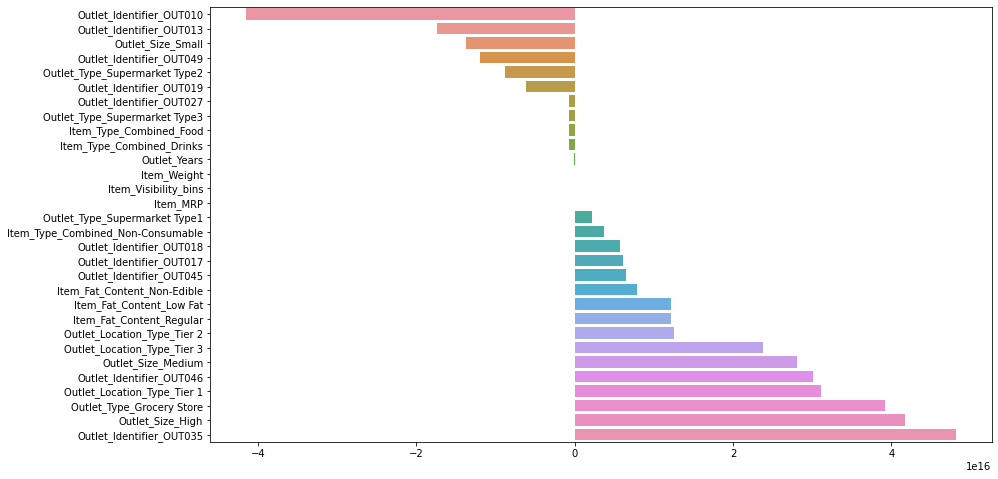

In [63]:
features= X.columns
coef = pd.Series(LR.coef_,features).sort_values()

# Barplot for coefficients
plt.figure(figsize=(14,8))
sns.barplot(x=coef,y=coef.index)

<AxesSubplot:>

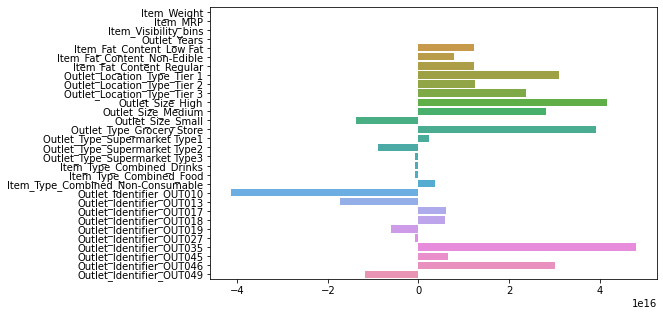

In [64]:
#OR
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,X.columns)

* __Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [65]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1114.314124513074
